# MODEL ANALYSIS

In [1]:
from time import time
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
% matplotlib inline

## LOAD TEST SET

In [2]:
df = pd.read_csv('data/wheat-2014-supervised.csv')
drop_cols = ['CountyName','State','Date', 'precipTypeIsOther'] + ['Latitude','Longitude'] 
df.drop(drop_cols,axis=1,inplace=True)
df.dropna(inplace=True)
df.head()

,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,precipIntensity,precipIntensityMax,precipProbability,precipAccumulation,precipTypeIsRain,precipTypeIsSnow,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
0,18.61,-3.01,0.00,6.77,0.69,0.0,0.0,0.0,0.0,0,0,1027.95,23.93,6.96,10.00,9,3.80,136.179718,0,35.6
1,19.67,-0.74,0.00,6.66,0.65,0.0,0.0,0.0,0.0,0,0,1028.26,25.88,8.71,10.00,352,6.03,135.697540,0,35.6
2,20.66,-0.14,0.00,6.55,0.67,0.0,0.0,0.0,0.0,0,0,1028.29,24.67,8.26,10.00,25,3.59,135.676956,0,35.6
3,19.69,-2.66,0.03,7.32,0.69,0.0,0.0,0.0,0.0,0,0,1027.74,25.48,8.10,10.00,1,5.18,135.005798,0,35.6
4,18.82,-3.04,0.04,7.62,0.70,0.0,0.0,0.0,0.0,0,0,1027.16,24.83,8.32,9.99,5,4.69,134.803864,0,35.6


In [3]:
X = np.matrix(df.ix[:,:-1])
y_true = list(df.ix[:,-1])

## LOAD MODEL

In [4]:
filename = 'wheat_ET_model.plk'
with open(filename,'rb') as f:
    model = pickle.load(f)

## MAKE PREDICTIONS

In [5]:
y_pred = [model.predict(X[i]) for i in range(len(X))]

## PLOT PREDICTION VS. TRUTH

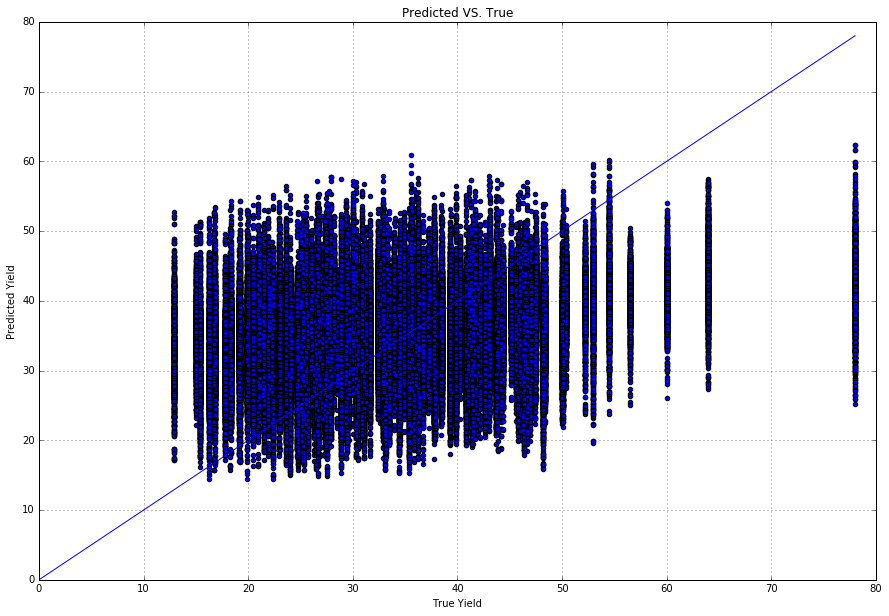

In [6]:
figs,axs = plt.subplots(ncols=1,nrows=1)
figs.set_figwidth(15)
figs.set_figheight(10)
ax = axs
ax.scatter(y_true,y_pred)
ax.plot([0,78],[0,78])
ax.set_xlim([0,80])
ax.set_ylim([0,80])
ax.set_title('Predicted VS. True')
ax.set_xlabel('True Yield')
ax.set_ylabel('Predicted Yield')
ax.grid(True)